In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
CS_data = pd.read_csv("Customer_support_data.csv")
T_data = pd.read_csv("titanic.csv")

In [4]:
CS_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [5]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,347082,G6,S
freq,491,1,577,7,4,644


<Axes: xlabel='channel_name', ylabel='Count'>

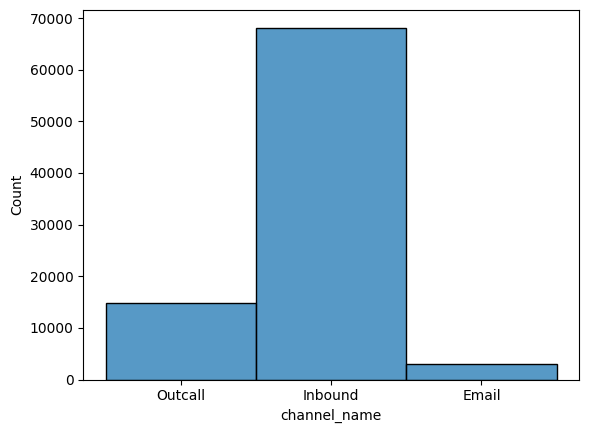

In [6]:
sns.histplot(data=CS_data, x="channel_name")

In [7]:
CS_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


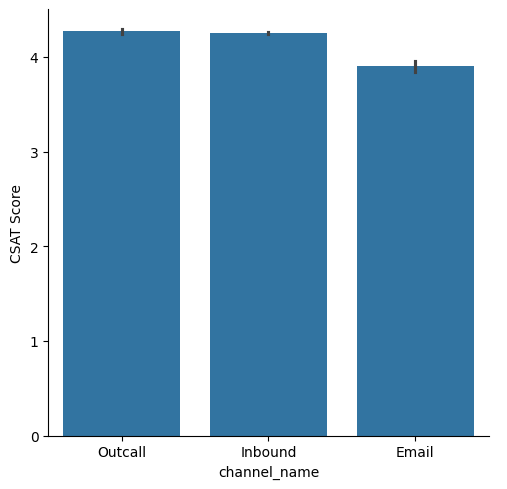

In [8]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

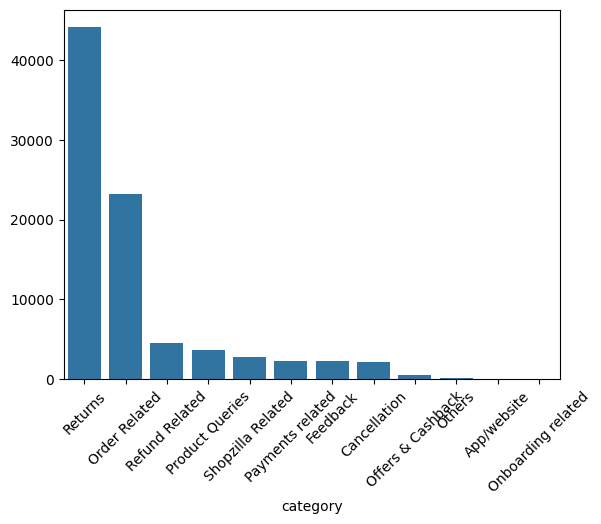

In [9]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

In [10]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)

In [11]:
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

In [12]:
CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

In [13]:
CS_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


In [14]:
CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')

In [15]:
CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


In [16]:
CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

In [17]:
CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

In [18]:
CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

In [19]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

In [20]:
T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

<ipython-input-20-7e2a4c6e8954>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  T_data.Pclass.replace({
<ipython-input-20-7e2a4c6e8954>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  T_data.Pclass.replace({


In [21]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [22]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

In [23]:
dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)

In [24]:
T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

In [25]:
CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",

], axis=1)

In [26]:
CS_dummies = pd.get_dummies(CS_dropped)

## 1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

Titanic

In [32]:
numeric_cols = T_dummies.select_dtypes(include=['int64', 'float64']).columns

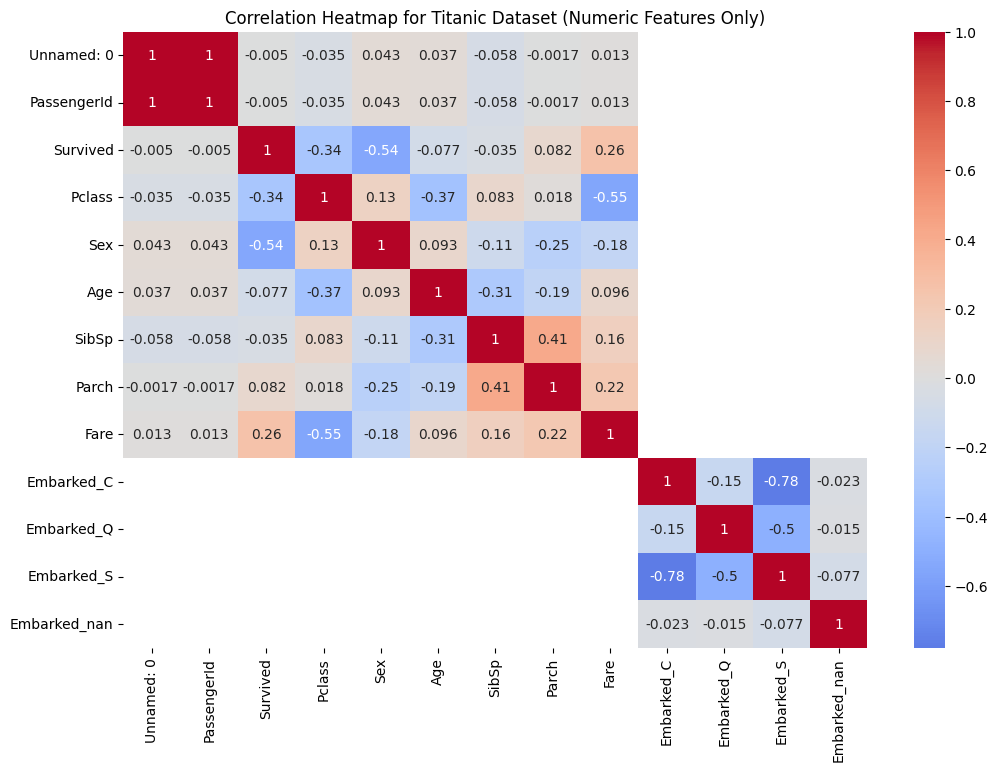

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(T_dummies[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Titanic Dataset (Numeric Features Only)')
plt.show()

Customer Support

In [34]:
numeric_cols_cs = CS_dummies.select_dtypes(include=['int64', 'float64']).columns

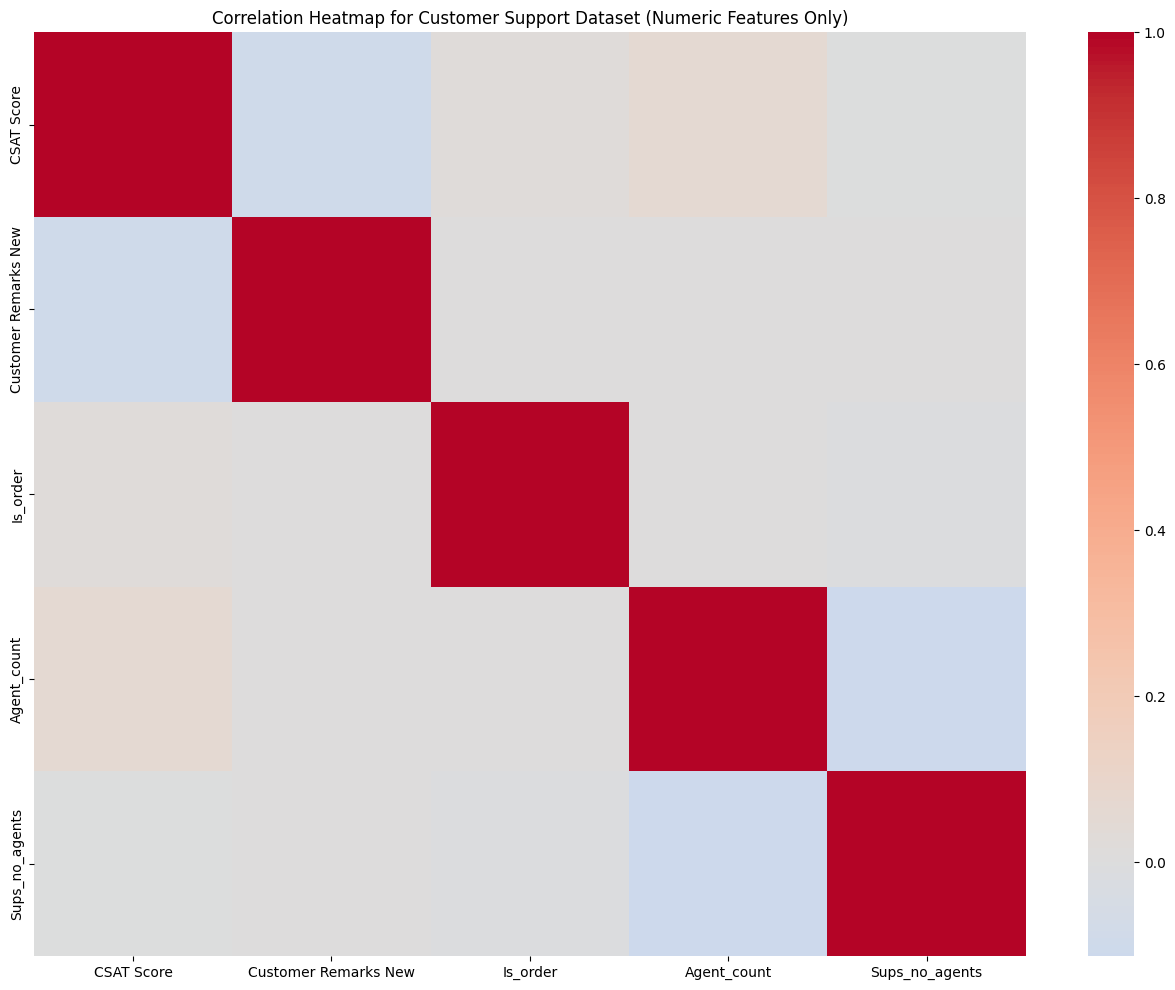

In [35]:
plt.figure(figsize=(16, 12))
sns.heatmap(CS_dummies[numeric_cols_cs].corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Customer Support Dataset (Numeric Features Only)')
plt.show()

Другие виды визуализаций

Titanic

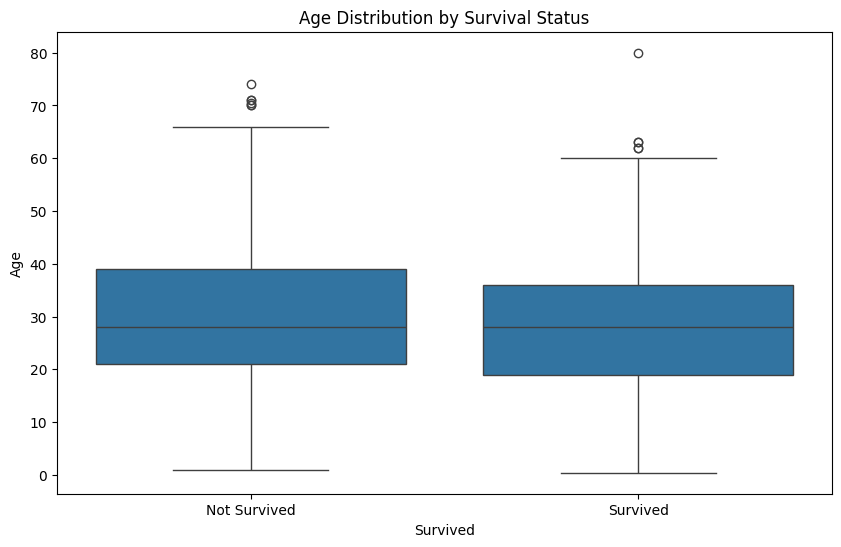

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=T_data)
plt.title('Age Distribution by Survival Status')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

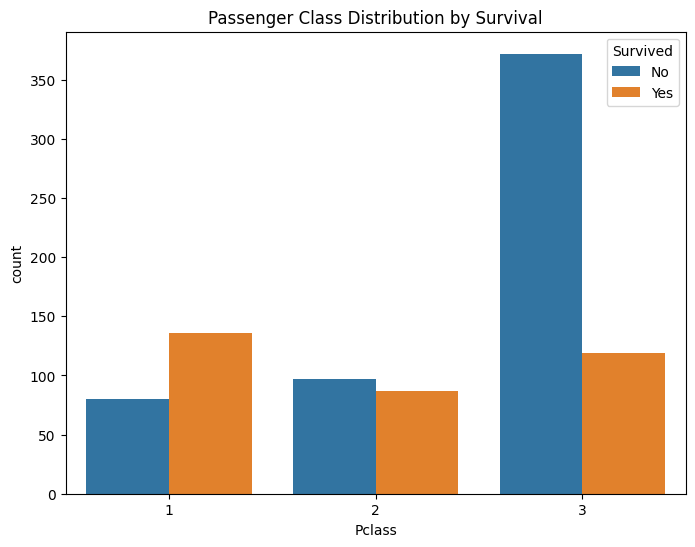

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=T_data)
plt.title('Passenger Class Distribution by Survival')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

Customer Support

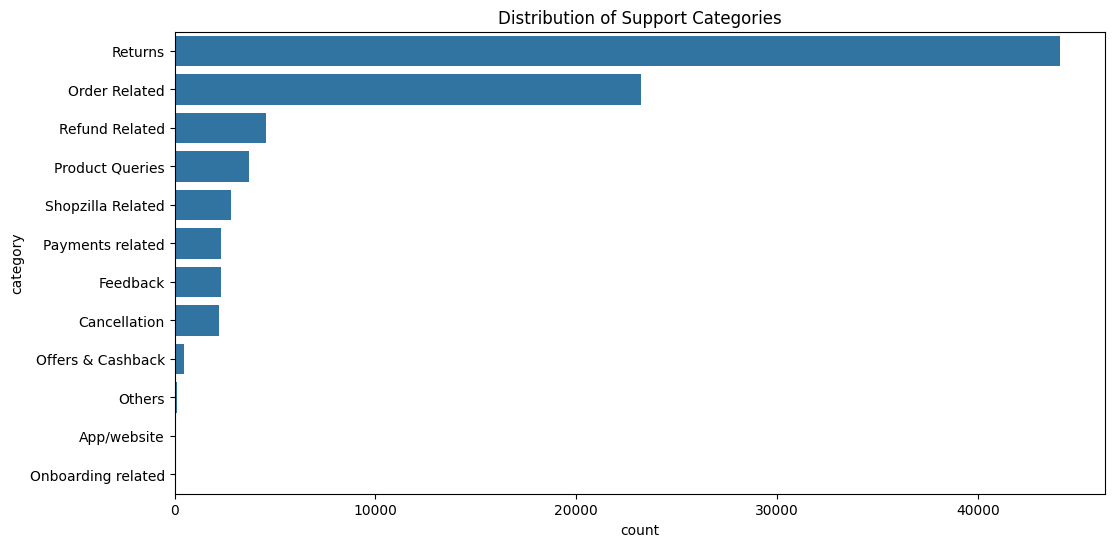

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(y='category', data=CS_data, order=CS_data['category'].value_counts().index)
plt.title('Distribution of Support Categories')
plt.show()

## 2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [46]:
if 'CSAT' in CS_dummies.columns:
    CS_dummies['CSAT_binary'] = (CS_dummies['CSAT'] >= 4).astype(int)
    X = CS_dummies.drop(['CSAT', 'CSAT_binary'], axis=1, errors='ignore')
    y = CS_dummies['CSAT_binary']
else:
    threshold = CS_dummies['connected_handling_time_0.0'].median()
    y = (CS_dummies['connected_handling_time_0.0'] > threshold).astype(int)
    X = CS_dummies.drop('connected_handling_time_0.0', axis=1, errors='ignore')

In [47]:
X = X.fillna(0)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [56]:
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9999611997051178

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25772
           1       0.00      0.00      0.00         1

    accuracy                           1.00     25773
   macro avg       0.50      0.50      0.50     25773
weighted avg       1.00      1.00      1.00     25773



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [57]:
feature_importances = dt_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

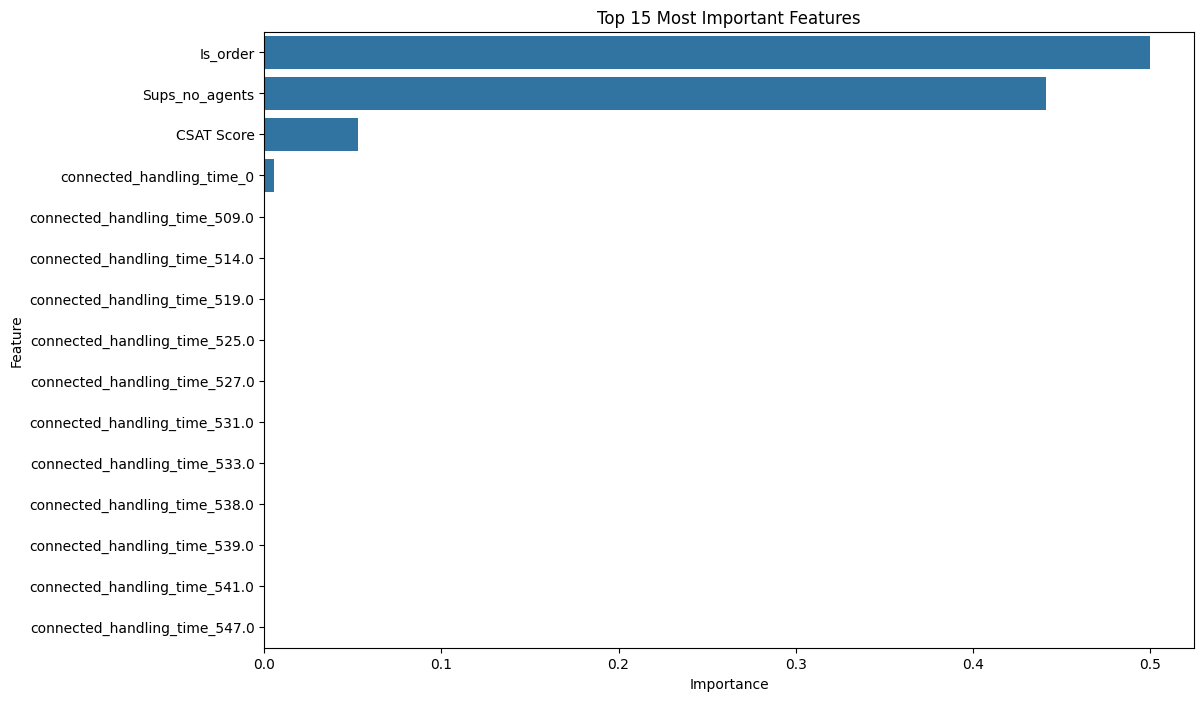

In [58]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(15))
plt.title('Top 15 Most Important Features')
plt.show()

In [59]:
print("Feature Importances:")
print(features_df.head(15))

Feature Importances:
                           Feature  Importance
2                         Is_order    0.500008
4                   Sups_no_agents    0.441184
0                       CSAT Score    0.053175
240      connected_handling_time_0    0.005633
161  connected_handling_time_509.0    0.000000
162  connected_handling_time_514.0    0.000000
163  connected_handling_time_519.0    0.000000
164  connected_handling_time_525.0    0.000000
165  connected_handling_time_527.0    0.000000
166  connected_handling_time_531.0    0.000000
167  connected_handling_time_533.0    0.000000
168  connected_handling_time_538.0    0.000000
169  connected_handling_time_539.0    0.000000
170  connected_handling_time_541.0    0.000000
171  connected_handling_time_547.0    0.000000


## 3. Разбейте датасет на тестовую и обучающую выборки и преобразуйте обе подвыборки. Тестовую нужно преобразовывать точно также, как и обучающую (с теми же параметрами).

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

In [60]:
CS_data['target'] = (CS_data['CSAT'] >= 4).astype(int) if 'CSAT' in CS_data.columns else 0

In [61]:
X = CS_data.drop('target', axis=1)
y = CS_data['target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [63]:
numeric_features = ['connected_handling_time', 'Agent_count', 'Sups_no_agents']
categorical_features = ['category', 'Product_category', 'Is_order', 'Customer Remarks New']

In [70]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [71]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [74]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [79]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', SelectKBest(score_func=f_classif, k=10))
])

In [80]:
X_train_prepared = full_pipeline.fit_transform(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)


In [81]:
X_test_prepared = full_pipeline.transform(X_test)

In [82]:
onehot_columns = full_pipeline.named_steps['preprocessor']\
    .named_transformers_['cat']\
    .named_steps['onehot']\
    .get_feature_names_out(categorical_features)

In [83]:
feature_names = numeric_features + list(onehot_columns)
selected_features = [feature_names[i] for i in
                   full_pipeline.named_steps['feature_selector'].get_support(indices=True)]

In [85]:
print(f"Train shape: {X_train_prepared.shape}")
print(f"Test shape: {X_test_prepared.shape}")

Train shape: (60134, 10)
Test shape: (25773, 10)


In [86]:
print("\nFirst train sample:")
print(X_train_prepared[0])
print("\nFirst test sample:")
print(X_test_prepared[0])


First train sample:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 10)>
  Coords	Values
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 8)	1.0

First test sample:
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 10)>
  Coords	Values
  (0, 5)	1.0
  (0, 6)	1.0
  (0, 8)	1.0


In [89]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_prepared, y_train)

RandomForestClassifier(random_state=42)

In [90]:
train_score = model.score(X_train_prepared, y_train)
test_score = model.score(X_test_prepared, y_test)

In [91]:
print(f"Train accuracy: {train_score:.3f}")
print(f"Test accuracy: {test_score:.3f}")

Train accuracy: 1.000
Test accuracy: 1.000


## 4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [122]:
from sklearn.metrics import confusion_matrix

1. Загрузка и первичный осмотр данных

In [92]:
titanic = pd.read_csv("titanic.csv")

In [93]:
print(titanic.info())
print(titanic.head())
print(titanic.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None
   Unnamed: 0  PassengerId  Survived Pclass  \
0           0            1         0  third   
1           1            2         1  first   
2           2            3         1  third   
3        

2. Обработка пропущенных значений

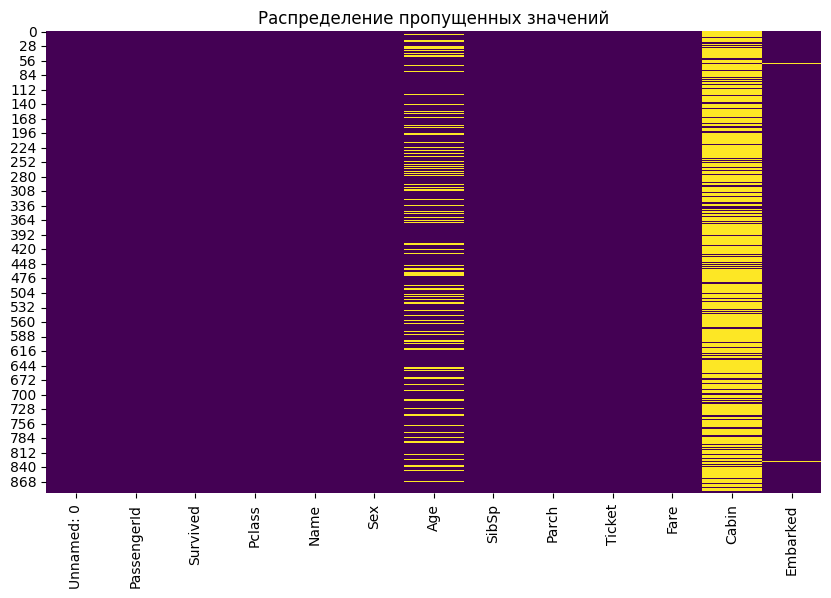

In [94]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Распределение пропущенных значений')
plt.show()

In [95]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)

<ipython-input-95-f3ae9743c640>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
<ipython-input-95-f3ae9743c640>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [96]:
print(f"Осталось пропусков: {titanic.isnull().sum().sum()}")

Осталось пропусков: 0


3. Разведочный анализ и визуализации

Распределение выживших

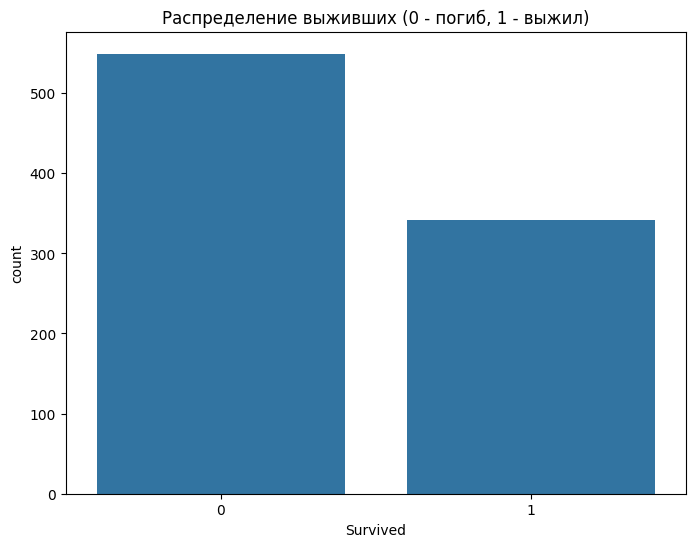

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=titanic)
plt.title('Распределение выживших (0 - погиб, 1 - выжил)')
plt.show()

In [98]:
print(f"Процент выживших: {titanic['Survived'].mean()*100:.1f}%")

Процент выживших: 38.4%


Выживаемость по полу

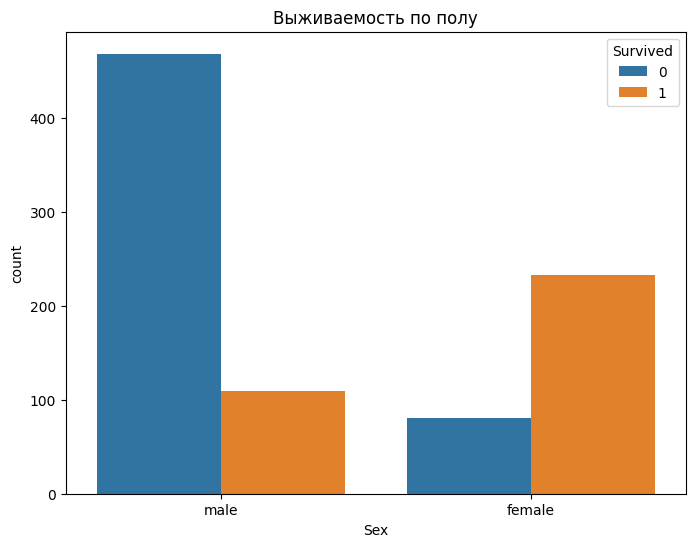

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Выживаемость по полу')
plt.show()

In [100]:
print(titanic.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Выживаемость по классу каюты

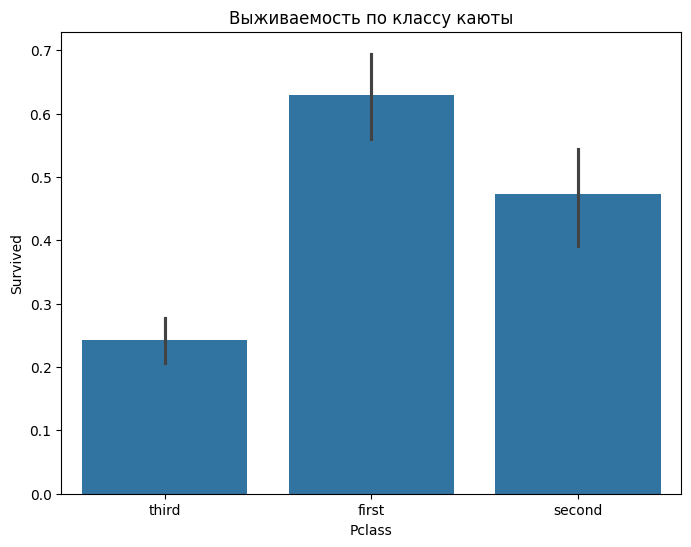

In [101]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Выживаемость по классу каюты')
plt.show()

In [102]:
print(titanic.groupby('Pclass')['Survived'].mean())

Pclass
first     0.629630
second    0.472826
third     0.242363
Name: Survived, dtype: float64


Распределение возраста

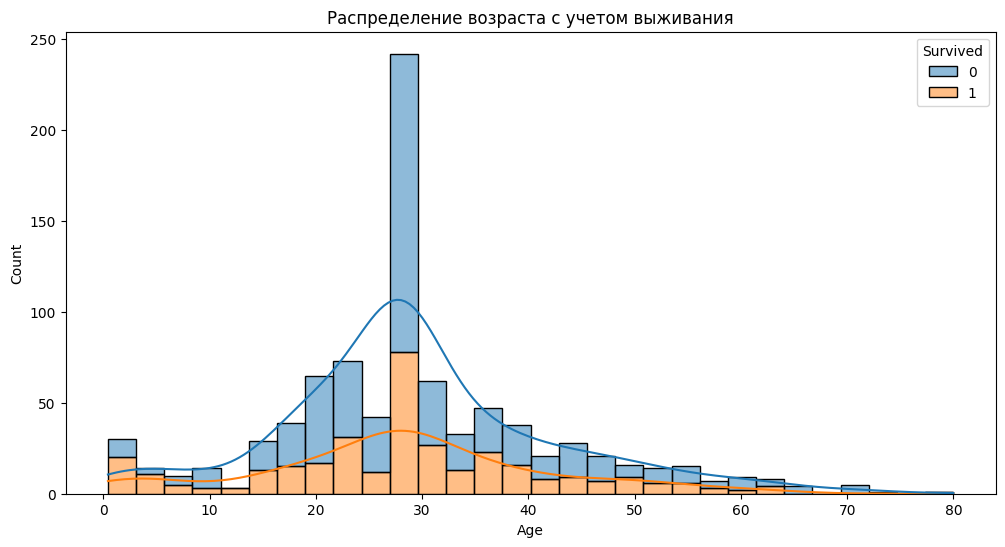

In [103]:
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=titanic, bins=30, kde=True, multiple='stack')
plt.title('Распределение возраста с учетом выживания')
plt.show()

In [104]:
children = titanic[titanic['Age'] < 16]
print(f"Выживаемость детей: {children['Survived'].mean()*100:.1f}%")

Выживаемость детей: 59.0%


Корреляционный анализ

In [105]:
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [128]:
numeric_cols = titanic_encoded.select_dtypes(include=['int64', 'float64']).columns

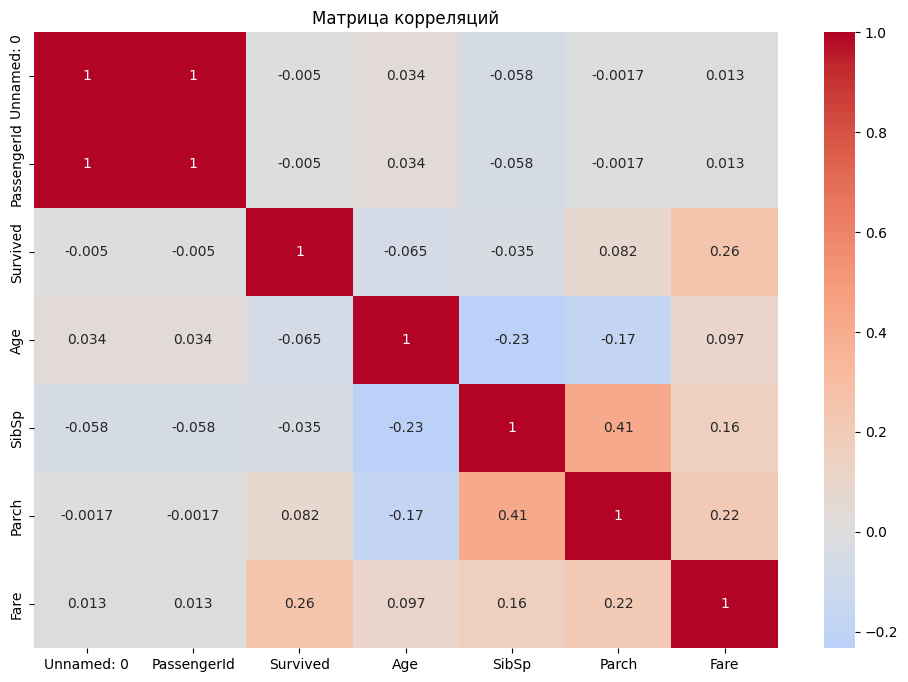

In [129]:
plt.figure(figsize=(12, 8))
sns.heatmap(titanic_encoded[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

4. Feature Engineering

In [108]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
titanic['Title'] = titanic['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
titanic['Title'] = titanic['Title'].replace('Mlle', 'Miss')
titanic['Title'] = titanic['Title'].replace('Ms', 'Miss')
titanic['Title'] = titanic['Title'].replace('Mme', 'Mrs')

Text(0.5, 1.0, 'Выживаемость одиноких пассажиров')

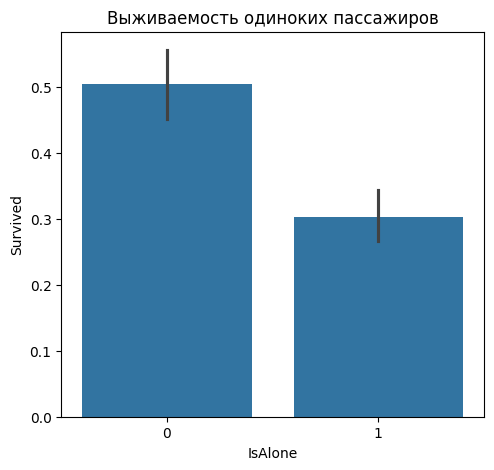

In [109]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='IsAlone', y='Survived', data=titanic)
plt.title('Выживаемость одиноких пассажиров')

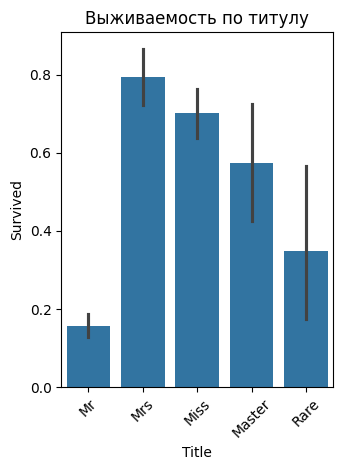

In [110]:
plt.subplot(1, 2, 2)
sns.barplot(x='Title', y='Survived', data=titanic)
plt.title('Выживаемость по титулу')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Подготовка данных для моделирования

In [111]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X = titanic[features]
y = titanic['Survived']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'IsAlone', 'Title']

In [114]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [115]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [116]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [117]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

6. Построение и оценка модели

In [118]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=42)

In [119]:
y_pred = model.predict(X_test_processed)

In [120]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.827

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



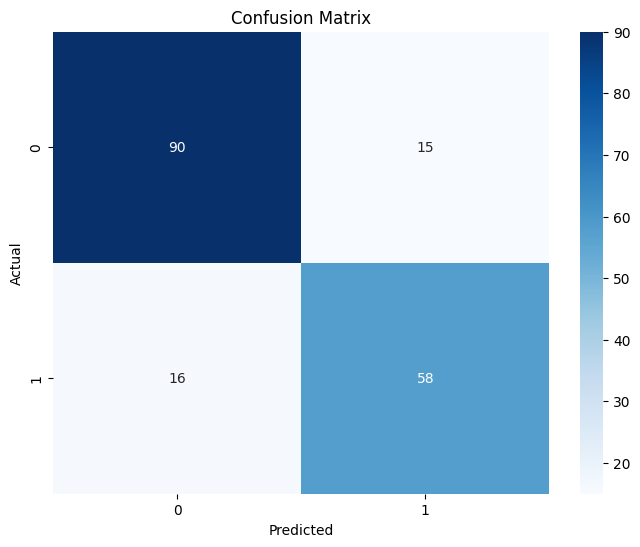

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

7. Анализ важности признаков

In [124]:
onehot_columns = list(preprocessor.named_transformers_['cat']
                .named_steps['onehot']
                .get_feature_names_out(categorical_features))
feature_names = numeric_features + onehot_columns

In [125]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

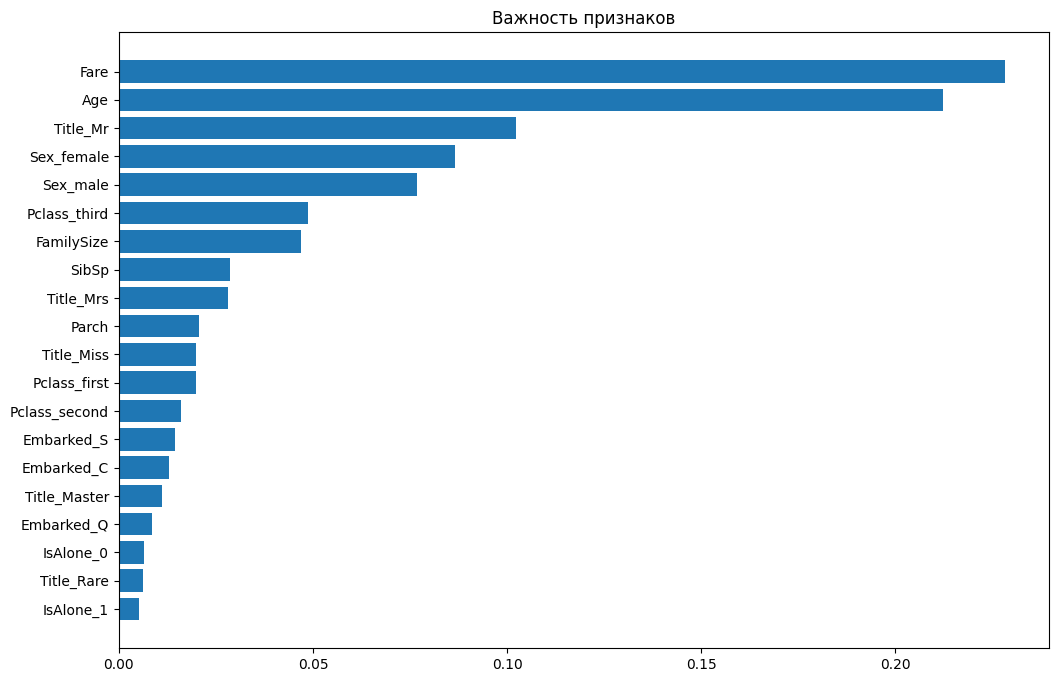

In [126]:
plt.figure(figsize=(12, 8))
plt.title("Важность признаков")
plt.barh(range(len(indices)), importances[indices][::-1], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices[::-1]])
plt.show()

## 5. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели. Проверьте на простом виде модели (линейная регрессия, дерево решений или случайный лес). Поэкспериментируйте с различными вариантами преобразований.

In [142]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer

Базовый вариант

In [131]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked']

In [132]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [133]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [134]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [135]:
X = titanic[numeric_features + categorical_features]
y = titanic['Survived']

In [136]:
base_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [139]:
base_scores = cross_val_score(base_pipeline, X, y, cv=5, scoring='accuracy')
print(f"Базовая точность: {np.mean(base_scores):.4f} (±{np.std(base_scores):.4f})")

Базовая точность: 0.8048 (±0.0314)


Добавление FamilySize и IsAlone

In [140]:
def add_family_features(X):
    X = X.copy()
    X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
    X['IsAlone'] = (X['FamilySize'] == 1).astype(int)
    return X

In [143]:
family_pipeline = Pipeline(steps=[
    ('feature_adder', FunctionTransformer(add_family_features)),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [144]:
numeric_features_extended = numeric_features + ['FamilySize', 'IsAlone']

In [145]:
family_scores = cross_val_score(family_pipeline, X, y, cv=5, scoring='accuracy')
print(f"С FamilySize/IsAlone: {np.mean(family_scores):.4f} (±{np.std(family_scores):.4f})")

С FamilySize/IsAlone: 0.8048 (±0.0314)


## 6. Создайте воспроизводимый код обработки данного датасета.

In [161]:
from sklearn.base import BaseEstimator, TransformerMixin

In [157]:
def load_data():
    df = pd.read_csv("titanic.csv")
    print("Данные загружены. Размер:", df.shape)
    print("\nПервые 5 строк:")
    print(df.head())
    print("\nИнформация о данных:")
    print(df.info())
    print("\nСтатистика:")
    print(df.describe(include='all'))
    return df

In [158]:
titanic = load_data()

Данные загружены. Размер: (891, 13)

Первые 5 строк:
   Unnamed: 0  PassengerId  Survived Pclass  \
0           0            1         0  third   
1           1            2         1  first   
2           2            3         1  third   
3           3            4         1  first   
4           4            5         0  third   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN 

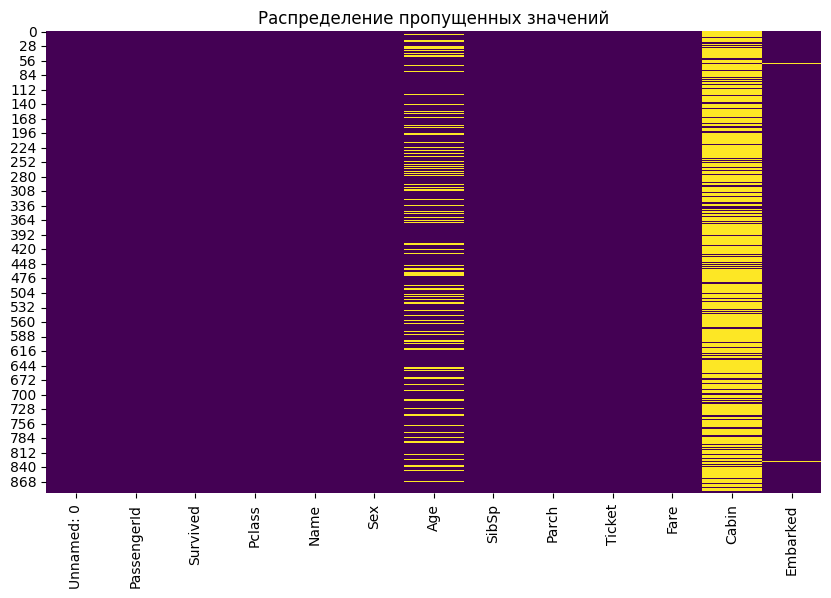

In [159]:
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
plt.title('Распределение пропущенных значений')
plt.show()

In [162]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        X['Title'] = X['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
        title_map = {
            'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
            'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Mlle': 'Miss',
            'Major': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare', 'Sir': 'Rare',
            'Mme': 'Mrs', 'Capt': 'Rare', 'Countess': 'Rare', 'Don': 'Rare',
            'Jonkheer': 'Rare', 'Dona': 'Rare'
        }
        X['Title'] = X['Title'].map(title_map).fillna('Mr')

        X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
        X['IsAlone'] = (X['FamilySize'] == 1).astype(int)

        X['AgeBin'] = pd.cut(X['Age'], bins=[0, 12, 18, 30, 50, 100], labels=False)

        X['LogFare'] = np.log1p(X['Fare'])

        return X

In [163]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [164]:
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'AgeBin', 'LogFare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [165]:
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Title']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [166]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [167]:
pipeline = Pipeline(steps=[
    ('features', FeatureEngineer()),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
pipeline.fit(X_train, y_train)
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)
print(f"\nОценка модели:\nTrain accuracy: {train_score:.4f}\nTest accuracy: {test_score:.4f}")


Оценка модели:
Train accuracy: 0.9817
Test accuracy: 0.8324


In [171]:
scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f"\nРезультаты кросс-валидации (5 фолдов):\nСредняя точность: {np.mean(scores):.4f} (±{np.std(scores):.4f})")


Результаты кросс-валидации (5 фолдов):
Средняя точность: 0.8081 (±0.0321)


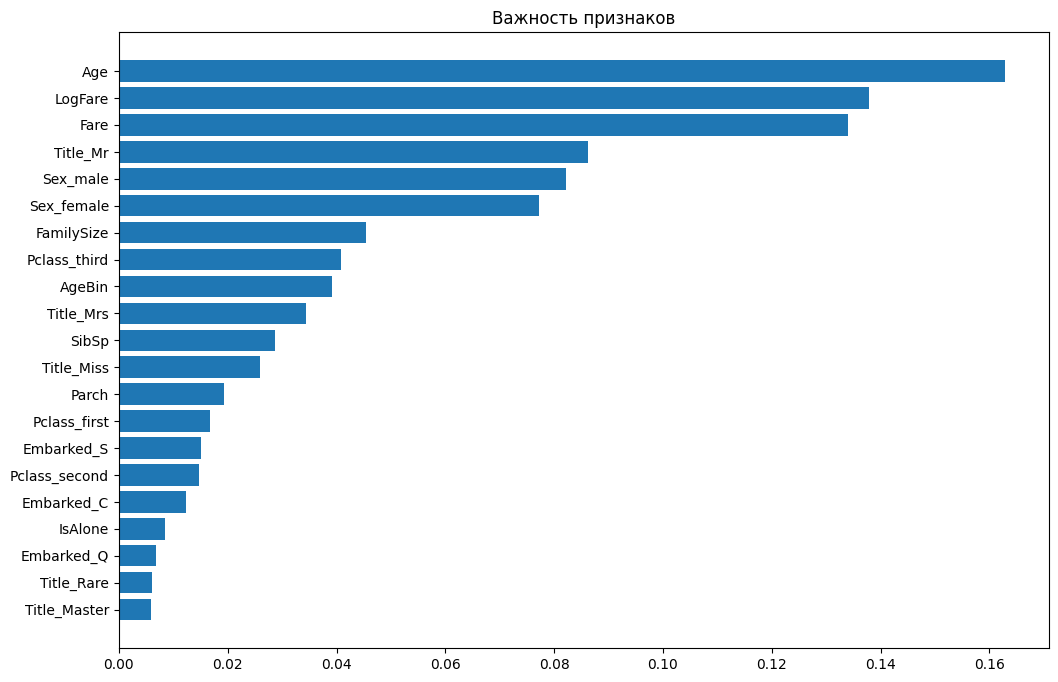

In [173]:
feature_names = numeric_features + list(
    pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .named_steps['onehot']
    .get_feature_names_out(categorical_features)
)

importances = pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Важность признаков")
plt.barh(range(len(indices)), importances[indices][::-1], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices[::-1]])
plt.show()